In [2]:
# in this chapter we will better understand how basic ml algorithms work.

In [3]:
# the cost function refers to the MSE

In [4]:
# Linear Regression
import numpy as np

In [5]:
# lets generate some random function
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)


<function matplotlib.pyplot.show(*args, **kw)>

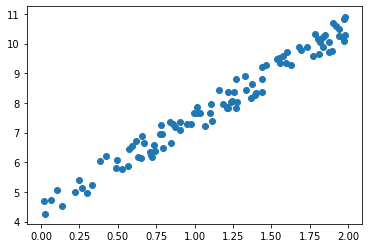

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show

In [7]:
# the normal equation
# theta_hat = (X^T X)^-1 X^T y
# theta_hat is the value of theta that minimizes the cost function

In [8]:
# we can use numpy to do matrix manipulation
X_b = np.c_[np.ones((100, 1)), X] # c_ stacks into 2d array, we need 1's because we want a theta_zero term
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_hat

array([[4.41246053],
       [3.07916482]])

In [10]:
# we can now make predictions using theta_hat
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_hat)
y_predict

array([[ 4.41246053],
       [10.57079017]])

<function matplotlib.pyplot.show(*args, **kw)>

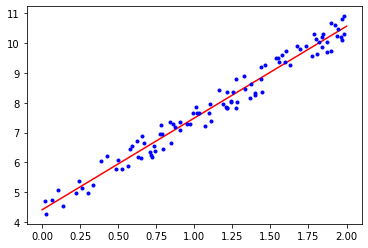

In [11]:
# lets visualise the prediction
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show

In [12]:
# we can do lin reg using scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept if theta_0 like usual lin relationship equation

(array([4.41246053]), array([[3.07916482]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.41246053],
       [10.57079017]])

In [14]:
# sklearn is a very fast and easy to learn lin reg module

In [15]:
# the next method is better suited for lagre data sets as sklearns linreg class is on O(n^2)
# **batched** gradient Descent
# main concept is to tweek parameters iteratively in order to minimise cost function

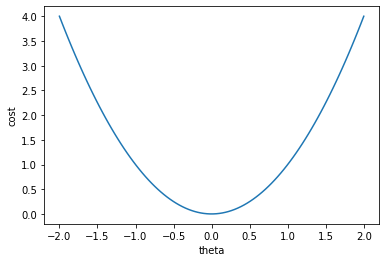

In [16]:
theta = np.linspace(-2, 2, 100)
Cost = theta**2
plt.plot(theta, Cost)
plt.ylabel("cost")
plt.xlabel("theta")
plt.show()
# if we start at a random point and find gradient at that point we can use it ot find the minimum.

In [17]:
# i did this in pytorch course and understand it pretty well so will skim through code

In [18]:
eta = 0.1 # learning rate hyper param
n_itera = 1000
m = 100

theta = np.random.randn(2,1) # random init

for itera in range(n_itera):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*grad

In [19]:
theta

array([[4.41246053],
       [3.07916482]])

In [20]:
# this is the same result the normal equation had!
# note though in this method we had to pick a learning rate and the number of iterations (hyper-param)
# to find good hyper param you can use grid search

In [21]:
# stochastic grad descent
# bounces around in a random manner but will bounce to the minimum, once at the minimum it will continue to move 
# around the minimum and not stay still on the min
# the randomness helps the algorithm jump out of local minima
# to help find the global minima better we can lower the learning rate as we go along (picking the change in rate is important)

In [22]:
n_epochs = 50
t0, t1 = 5, 50 #learning chedule hyper-params

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [23]:
theta # a good effort for only 50 epochs

array([[4.41038629],
       [3.06937987]])

In [24]:
# to do Stochastic GD with Scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.38633281]), array([3.14756147]))

In [26]:
# again scikit learn makes this method very quick to implement

In [27]:
# final GD method we will look at is minibatch grad decent
# at each step instead of computing grads based on the full set or one instance we use random sets of instances called
# mini-batches. This has a big performnce boost for hardware optimization of matrix operations (especially with GPU's)

In [28]:
# Polynomial Regression

# We can use the same methods as we just used but simply add more theta terms for more complex systems

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<function matplotlib.pyplot.show(*args, **kw)>

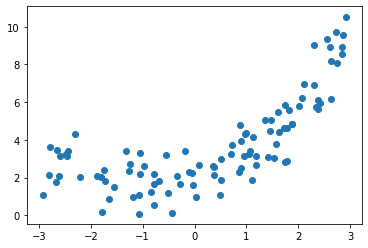

In [29]:
plt.scatter(X, y)
plt.show

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.83521601])

In [31]:
X_poly[0]

array([2.83521601, 8.03844983])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96230966]), array([[0.93629113, 0.49332492]]))

In [33]:
# our model predicted y = (0.517...)x^2 + (0.979...)x + 1.879...

In [34]:
# Learning Curves

# we can over or under fit a model. In C2 we used a cross-validation to get an estimate on the models generalization
# performance. If the model performs well on training but badly on test then it is overfitted. If it is bad
# on both then it is an underfitting

# another way to check the model is with leaning curves: these are plots of the models performance on the training 
# set and the validation set as a function of training set size. To generate the plots train the model several times on
# different sized subsets of the training sets

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    

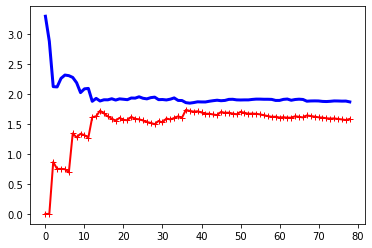

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

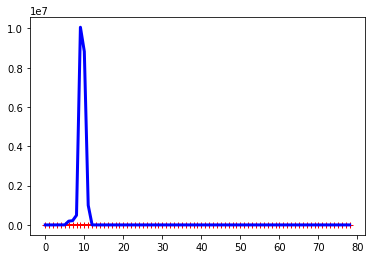

In [36]:
# now lets look at a 10 degree poly

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

In [37]:
# A good way to reduce overfitting is to regularize models. 
# ridge regression, we add a term to the cost function: alpha/2 * ∑^n_(i+1) theta^2_i
# If alpha is small we have normal linear regression. If large, all weights end up close to zero and the result is 
# a flat line going through the datas mean

# ridge regression using sklearn

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.91634604]])

In [38]:
# using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.89828588])

In [39]:
# these do the same thing, the penalty term indicates you want SGD to add a regularization term to the cost function.
# the reg term is hald the square of the l2 norm of the weight vector

In [41]:
# Lasso Regresasion

# here we use the L1 norm instead of half of L2
# lasso term = alpha ∑ |theta_i|
# the most important part of Lasso is that it tends to eliminate the least important features 

# scikit learn lasso method

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.87933978])

In [42]:
# elastic net

# it is the middle ground between ridge and lasso
# you should avoid normal lin reg and default to ridge, if you think some features dont matter then try lasso or
# elastic net
# too long a formula to type elastic net

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.87988567])

In [43]:
# Early stop

# a different way to regularize is once the validation error reaches a minimum you simply stop training

In [44]:
# Logistic Regression

# it is used for classsification. Lets look at the example using iris flowers

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [45]:
X = iris["data"][:, 3:] # pedal width
y = (iris["target"] == 2).astype(np.int) # 1 if virginica, 0 if else

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'Pedal Width')

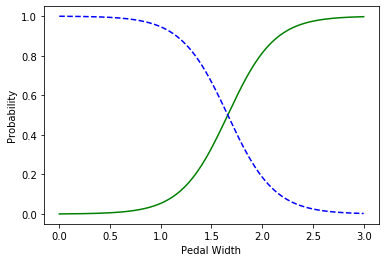

In [52]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-",label="virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="not virginica")
plt.ylabel("Probability")
plt.xlabel("Pedal Width")

In [53]:
# at about 1.6 width we see there is about 50/50 odds of it being an iris virginica